In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#  **DATA EXPLORATION**

# Load the dataset

In [2]:
# Loading the dataset
data = pd.read_csv('Houses_Sales_Prices.csv')

# Data overview

In [4]:
# To visualise the data
data.head()

#This shows it has missing values which are denoted by '.'

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,Antrim and Newtownabbey,Abbey,2005,85,24920,74000,82000,93427,108901,220000
1,Antrim and Newtownabbey,Abbey,2006,120,45000,86000,111000,121329,138000,499000
2,Antrim and Newtownabbey,Abbey,2007,57,30000,159975,192500,221449,238458,660000
3,Antrim and Newtownabbey,Abbey,2008,31,.,.,.,.,.,.
4,Antrim and Newtownabbey,Abbey,2009,22,.,.,.,.,.,.


In [5]:
# This gives the info of all the columns in the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Local Government District  560 non-null    object
 1   Electoral Ward (2014)      560 non-null    object
 2   Sale Year                  560 non-null    int64 
 3   No. of Verified Sales      560 non-null    int64 
 4   Minimum Sale Price         560 non-null    object
 5   Lower Quartile Sale Price  560 non-null    object
 6   Median Sale Price          560 non-null    object
 7   Simple Mean Sale Price     560 non-null    object
 8   Upper Quartile Sale Price  560 non-null    object
 9   Maximum Sale Price         560 non-null    object
dtypes: int64(2), object(8)
memory usage: 43.9+ KB
None


In [6]:
# Explore and visualize the dataset
print(data.describe())

         Sale Year  No. of Verified Sales
count   560.000000             560.000000
mean   2011.500000              46.428571
std       4.034733              27.379175
min    2005.000000               5.000000
25%    2008.000000              27.000000
50%    2011.500000              41.000000
75%    2015.000000              59.000000
max    2018.000000             193.000000


# Handle Missing Values

In [7]:
# Handle Missing Values - As this shows, there is not any missing value.
# However, when we check the data set, there are missing values, that are represented by '.' (dot)
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Local Government District    0
Electoral Ward (2014)        0
Sale Year                    0
No. of Verified Sales        0
Minimum Sale Price           0
Lower Quartile Sale Price    0
Median Sale Price            0
Simple Mean Sale Price       0
Upper Quartile Sale Price    0
Maximum Sale Price           0
dtype: int64


In [8]:
# There are dots present in the dataset,Replace dots with NaN to represent missing values
data.replace(".", np.nan, inplace=True)
# Visualise the data to check if the dots are replaced by NaN Values
data

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,Antrim and Newtownabbey,Abbey,2005,85,24920,74000,82000,93427,108901,220000
1,Antrim and Newtownabbey,Abbey,2006,120,45000,86000,111000,121329,138000,499000
2,Antrim and Newtownabbey,Abbey,2007,57,30000,159975,192500,221449,238458,660000
3,Antrim and Newtownabbey,Abbey,2008,31,NaN,NaN,NaN,NaN,NaN,NaN
4,Antrim and Newtownabbey,Abbey,2009,22,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
555,Antrim and Newtownabbey,Whitehouse,2014,31,NaN,NaN,NaN,NaN,NaN,NaN
556,Antrim and Newtownabbey,Whitehouse,2015,33,40000,56000,72500,84594,92000,300000
557,Antrim and Newtownabbey,Whitehouse,2016,38,41500,68000,83975,94435,96000,395000
558,Antrim and Newtownabbey,Whitehouse,2017,45,46000,69000,88975,98683,100500,340000


In [9]:
# Check missing values after replacing dots with NaN
# This shows that the data has missing value with a count in each column
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Local Government District      0
Electoral Ward (2014)          0
Sale Year                      0
No. of Verified Sales          0
Minimum Sale Price           207
Lower Quartile Sale Price    207
Median Sale Price            207
Simple Mean Sale Price       207
Upper Quartile Sale Price    207
Maximum Sale Price           207
dtype: int64


# Using median as a imputer for missing values

Robustness to Outliers: The median is less sensitive to outliers compared to the mean. If there are outliers present in the data, using the mean to fill missing values could be influenced by these outliers, leading to a biased estimate. By using the median, we ensure that extreme values have less impact on the imputation process.

In [10]:
# Impute missing Values in Columns with mean values
columns_with_numerical_values = ['Minimum Sale Price', 'Lower Quartile Sale Price',
           'Median Sale Price', 'Simple Mean Sale Price',
           'Upper Quartile Sale Price', 'Maximum Sale Price']

# Convert columns to numeric data type
data[columns_with_numerical_values] = data[columns_with_numerical_values].apply(pd.to_numeric, errors='coerce')

# Fill missing values in columns with missing values with the mean of each column
data[columns_with_numerical_values] = data[columns_with_numerical_values].fillna(data[columns_with_numerical_values].median())
data

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,Antrim and Newtownabbey,Abbey,2005,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0
1,Antrim and Newtownabbey,Abbey,2006,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0
2,Antrim and Newtownabbey,Abbey,2007,57,30000.0,159975.0,192500.0,221449.0,238458.0,660000.0
3,Antrim and Newtownabbey,Abbey,2008,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
4,Antrim and Newtownabbey,Abbey,2009,22,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
...,...,...,...,...,...,...,...,...,...,...
555,Antrim and Newtownabbey,Whitehouse,2014,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
556,Antrim and Newtownabbey,Whitehouse,2015,33,40000.0,56000.0,72500.0,84594.0,92000.0,300000.0
557,Antrim and Newtownabbey,Whitehouse,2016,38,41500.0,68000.0,83975.0,94435.0,96000.0,395000.0
558,Antrim and Newtownabbey,Whitehouse,2017,45,46000.0,69000.0,88975.0,98683.0,100500.0,340000.0


# Explore distribution of features
The pairplot function creates a grid of scatterplots and histograms where each variable in the dataset is plotted against every other variable. It's a powerful tool for visualizing relationships between multiple variables at once.

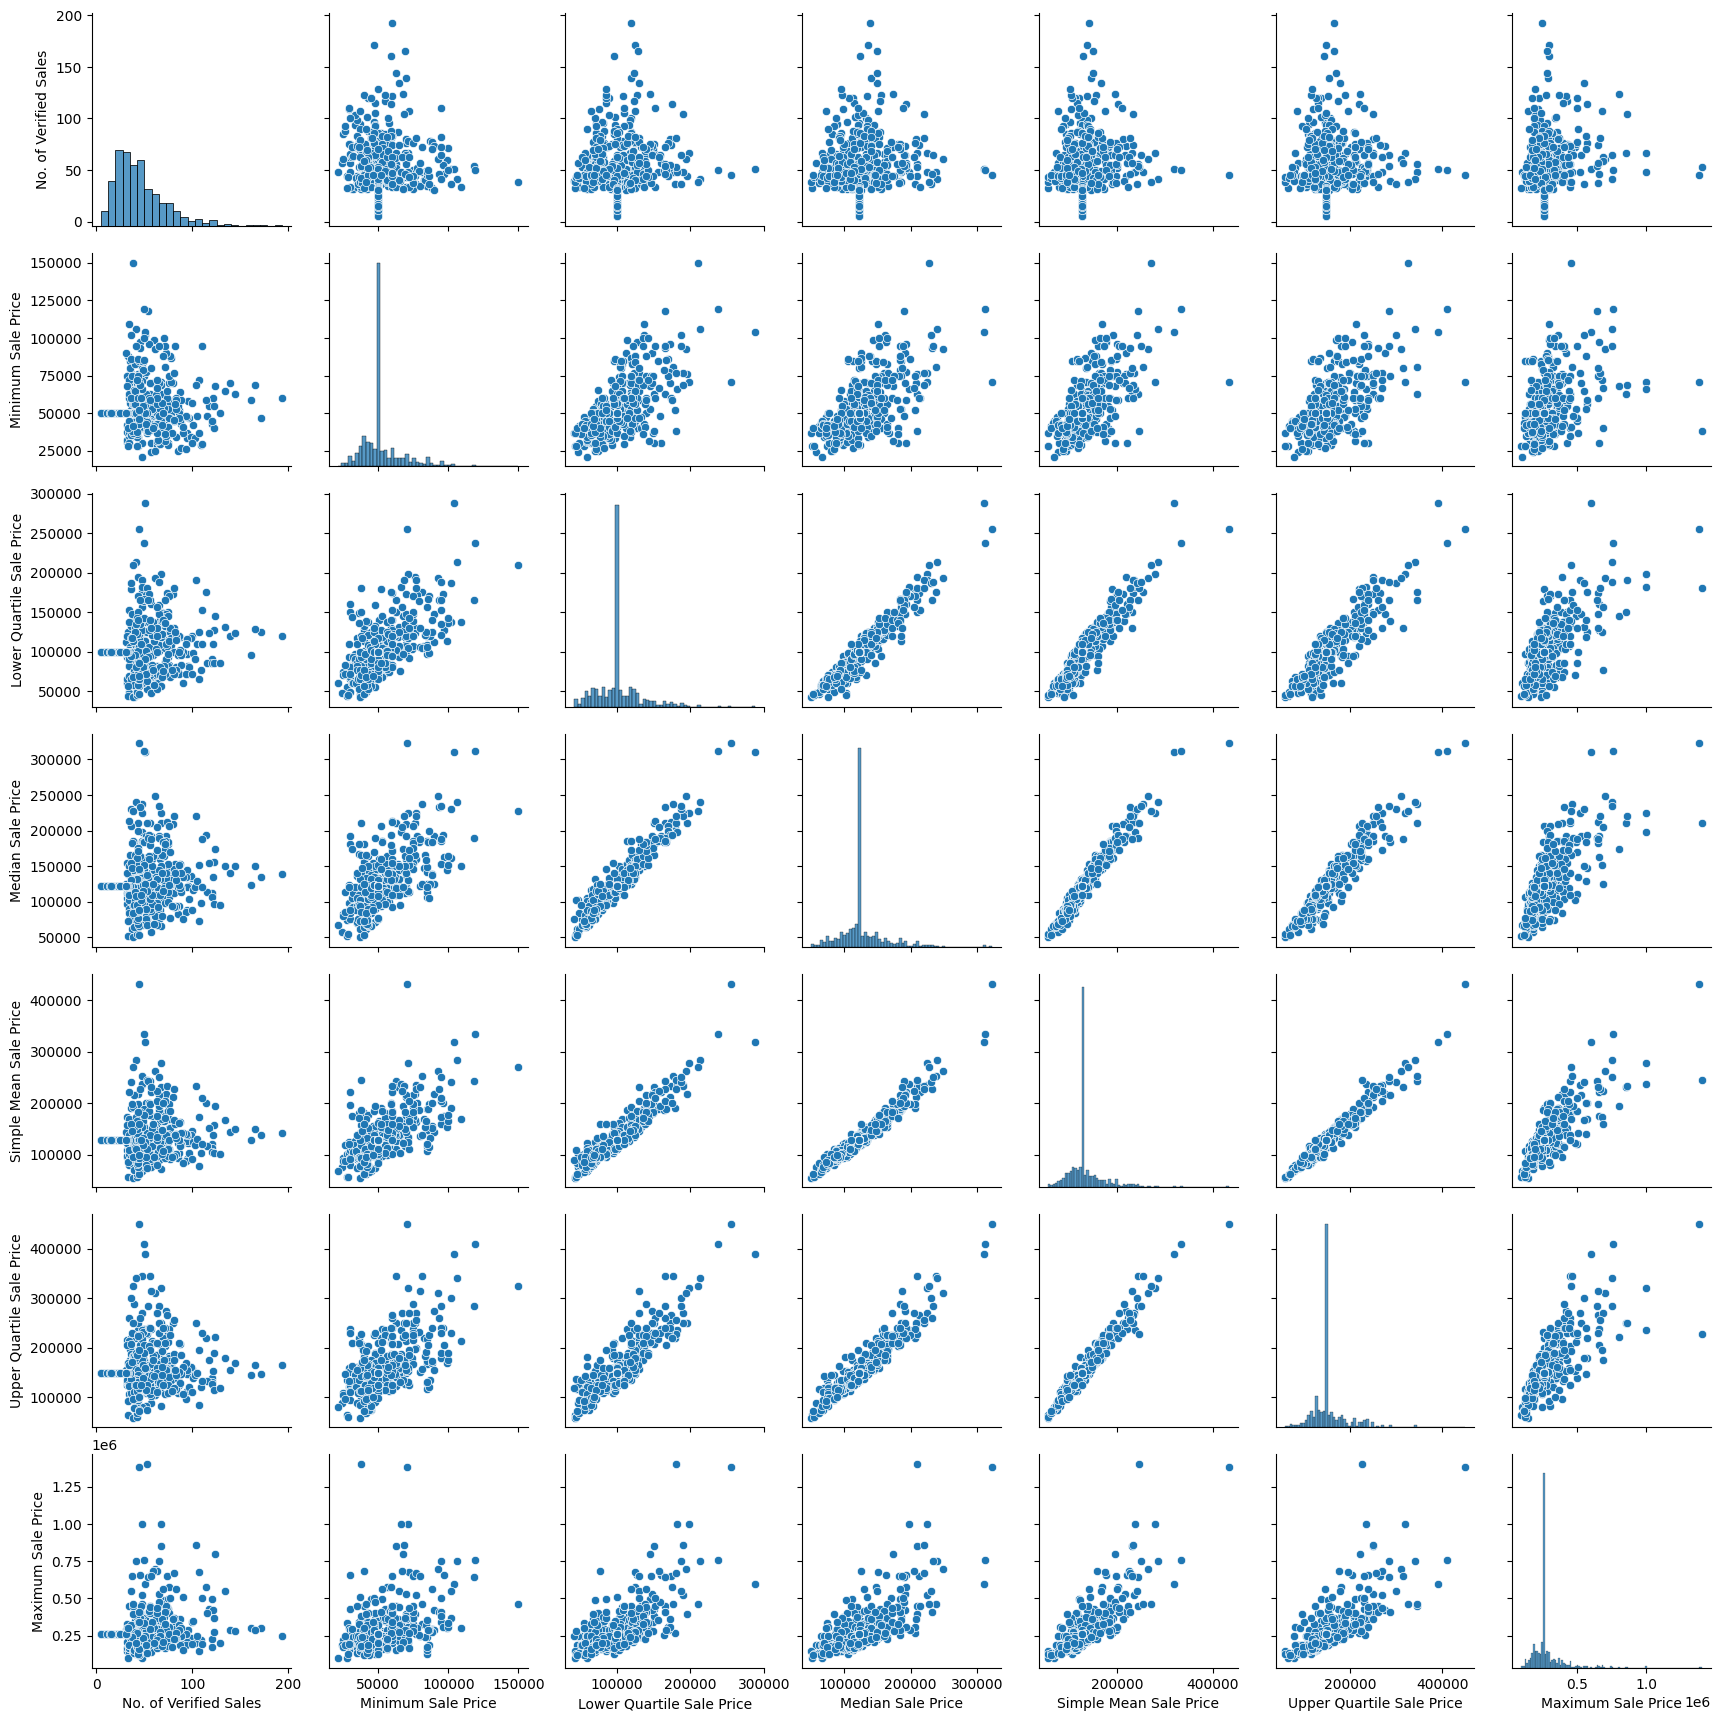

In [12]:
# Explore distribution of features
columns = ['No. of Verified Sales', 'Minimum Sale Price', 'Lower Quartile Sale Price',
           'Median Sale Price', 'Simple Mean Sale Price',
           'Upper Quartile Sale Price', 'Maximum Sale Price']
sns.pairplot(data[columns])
plt.show()

# Identify relevant features that could influence housing prices.
Compute the correlation matrix between features and the target variable (sale prices) to identify features with strong correlations.

A strong positive linear link between the feature and the target variable is indicated by correlation values near 1. For instance, there are strong positive relationships between the Median Sale Price and the Simple Mean Sale Price, Lower Quartile Sale Price, Upper Quartile Sale Price, and Maximum Sale Price. This implies that the median sale price tends to rise along with these qualities.

A modest positive linear association with the target variable is indicated by features that have correlation values closer to 0 but between 0 and 1. When compared to other variables, the minimum sale price and the number of verified sales, for instance, have weaker positive relationships.

In [13]:
# Compute correlation matrix
correlation_matrix = data[columns].corr()

# Sort correlation values with respect to the target variable
correlation_with_target = correlation_matrix['Median Sale Price'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_target)

Median Sale Price            1.000000
Simple Mean Sale Price       0.973241
Lower Quartile Sale Price    0.955114
Upper Quartile Sale Price    0.948157
Maximum Sale Price           0.725474
Minimum Sale Price           0.634852
No. of Verified Sales        0.122119
Name: Median Sale Price, dtype: float64


# Correlation Matrix: 
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table represents the correlation between two variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to 1, where:

1 indicates a perfect positive correlation,
-1 indicates a perfect negative correlation, and
0 indicates no correlation.

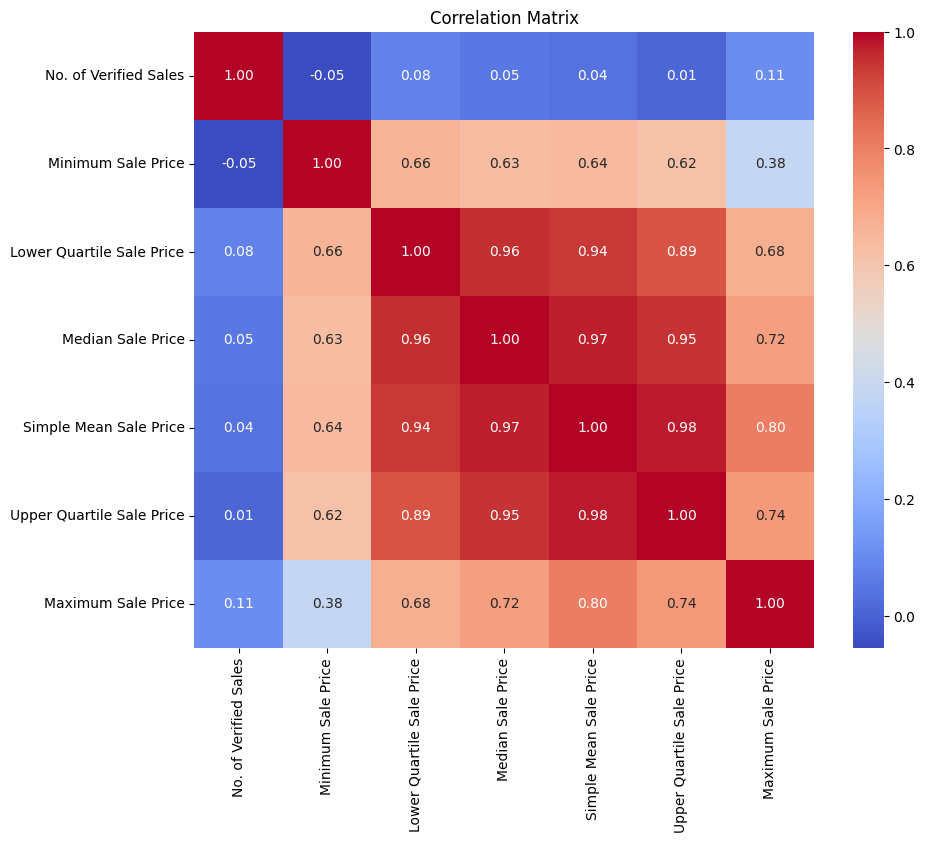

In [135]:
# Correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Imbalances in the target vector

The histogram specifically depicts the distribution of the median sale prices of houses.
Each bar in the histogram represents a range of median sale prices, and the height of the bar indicates the frequency or count of houses falling within that price range.

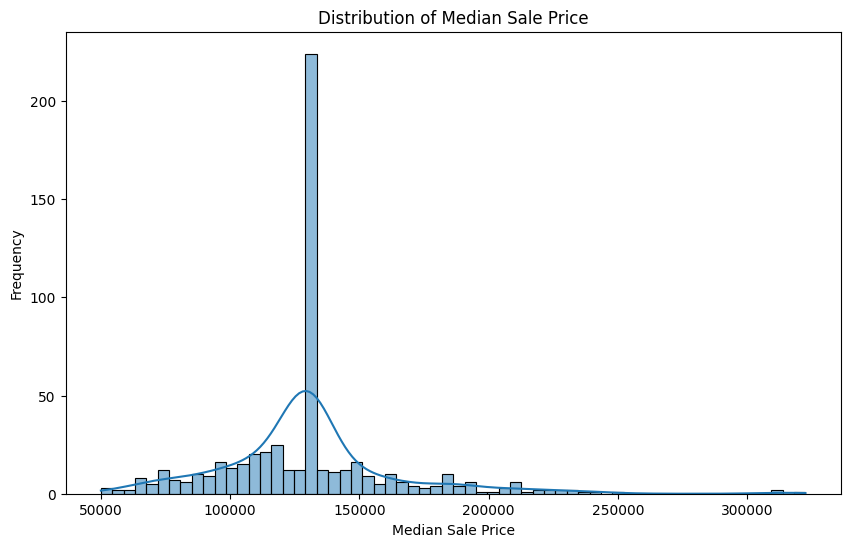

In [136]:
# Imbalances in the target vector
plt.figure(figsize=(10, 6))
sns.histplot(data['Median Sale Price'], kde=True)
plt.title("Distribution of Median Sale Price")
plt.xlabel("Median Sale Price")
plt.ylabel("Frequency")
plt.show()

# Handling Outliers

**Visualising outliers**

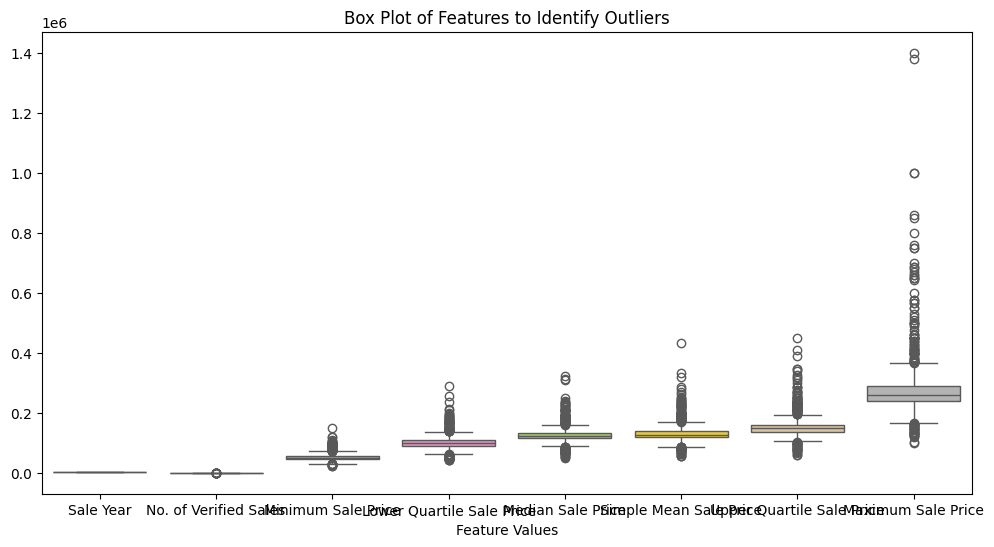

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is DataFrame containing the features
# Set up the figure and axes for plotting
plt.figure(figsize=(12, 6))

# Plot box plots for each feature
sns.boxplot(data=data, orient='v', palette='Set2')

# Set title and labels
plt.title('Box Plot of Features to Identify Outliers')
plt.xlabel('Feature Values')

# Display the plot
plt.show()


**Removing Outliers**

# Threshold for Extreme Outliers:

In this case, the code sets a threshold of 2.5 standard deviations. Any data point with a Z-score greater than this threshold is considered an extreme outlier.
Outliers with Z-scores beyond this threshold are likely to have a substantial impact on the distribution and statistical properties of the dataset. By removing data points with Z-scores greater than 2.5, the code aims to retain the majority of the dataset while filtering out extreme outliers that might skew the analysis or model predictions. Adjusting the threshold allows for more or fewer data points to be considered outliers based on the desired level of tolerance for extreme values. 
This code is not removing all the outliers, but the extreme ones. Otherwise removing all the outliers deletes the major chunk of data. in order to avoid that, we used a threshhold value of 2.5.

In [14]:
# Handling outliers using Z-score
# Handling only extreme outliers with a threshold of 2.5
from scipy import stats
z_scores = np.abs(stats.zscore(data[columns_with_numerical_values]))
threshold = 2.5
outlier_rows, _ = np.where(z_scores > threshold)
data_cleaned = data.drop(outlier_rows)
print("", outlier_rows)
data_cleaned

 [  2  16  16  44  58  58  85  85  86 100 100 100 114 114 114 114 114 124
 142 169 170 170 170 170 170 170 180 181 184 184 184 186 198 226 226 253
 254 254 254 265 268 268 268 324 324 324 324 324 334 338 338 338 338 340
 393 393 404 404 404 404 404 434 434 434 434 435 435 435 435 435 435 436
 436 436 436 436 441 444 445 446 446 446 447 447 447 447 447 447 450 450
 450 450 450 460 461 505 506 506 506 506 506 506 547 548 548]


,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,Antrim and Newtownabbey,Abbey,2005,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0
1,Antrim and Newtownabbey,Abbey,2006,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0
3,Antrim and Newtownabbey,Abbey,2008,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
4,Antrim and Newtownabbey,Abbey,2009,22,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
5,Antrim and Newtownabbey,Abbey,2010,41,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
...,...,...,...,...,...,...,...,...,...,...
555,Antrim and Newtownabbey,Whitehouse,2014,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
556,Antrim and Newtownabbey,Whitehouse,2015,33,40000.0,56000.0,72500.0,84594.0,92000.0,300000.0
557,Antrim and Newtownabbey,Whitehouse,2016,38,41500.0,68000.0,83975.0,94435.0,96000.0,395000.0
558,Antrim and Newtownabbey,Whitehouse,2017,45,46000.0,69000.0,88975.0,98683.0,100500.0,340000.0


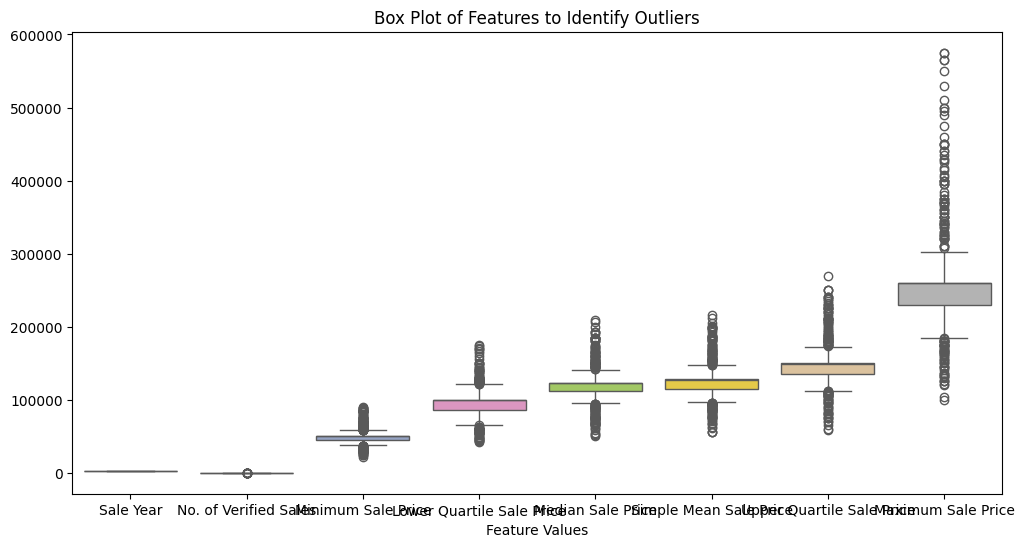

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the features

# Set up the figure and axes for plotting
plt.figure(figsize=(12, 6))

# Plot box plots for each feature
sns.boxplot(data=data_cleaned, orient='v', palette='Set2')

# Set title and labels
plt.title('Box Plot of Features to Identify Outliers')
plt.xlabel('Feature Values')

# Display the plot
plt.show()


# **FEATURE ENGINEERING**

# Identify relevant features that could influence housing prices

Compute the correlation matrix between features and the target variable (sale prices) to identify features with strong correlations.

A strong positive linear link between the feature and the target variable is indicated by correlation values near 1. For instance, there are strong positive relationships between the Median Sale Price and the Simple Mean Sale Price, Lower Quartile Sale Price, Upper Quartile Sale Price, and Maximum Sale Price. This implies that the median sale price tends to rise along with these qualities.

A modest positive linear association with the target variable is indicated by features that have correlation values closer to 0 but between 0 and 1. When compared to other variables, the minimum sale price and the number of verified sales, for instance, have weaker positive relationships.

In [16]:
# Compute correlation matrix
correlation_matrix = data_cleaned[columns].corr()

# Sort correlation values with respect to the target variable
correlation_with_target = correlation_matrix['Median Sale Price'].sort_values(ascending=False)

# Print correlation values
print(correlation_with_target)

Median Sale Price            1.000000
Simple Mean Sale Price       0.967800
Lower Quartile Sale Price    0.926713
Upper Quartile Sale Price    0.919936
Maximum Sale Price           0.610999
Minimum Sale Price           0.526091
No. of Verified Sales        0.078356
Name: Median Sale Price, dtype: float64


# Encoding Categorical values
The LabelEncoder class from scikit-learn is used to encode categorical variables into numerical format. It assigns a unique integer to each category present in the categorical variable.

In [17]:
# Encode categorical variables
label_encoder = LabelEncoder()
data_cleaned['Local Government District'] = label_encoder.fit_transform(data_cleaned['Local Government District'])
data_cleaned['Electoral Ward (2014)'] = label_encoder.fit_transform(data_cleaned['Electoral Ward (2014)'])
data_cleaned

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,0,0,2005,85,24920.0,74000.0,82000.0,93427.0,108901.0,220000.0
1,0,0,2006,120,45000.0,86000.0,111000.0,121329.0,138000.0,499000.0
3,0,0,2008,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
4,0,0,2009,22,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
5,0,0,2010,41,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
...,...,...,...,...,...,...,...,...,...,...
555,0,39,2014,31,50000.0,100000.0,122475.0,127295.0,149000.0,260000.0
556,0,39,2015,33,40000.0,56000.0,72500.0,84594.0,92000.0,300000.0
557,0,39,2016,38,41500.0,68000.0,83975.0,94435.0,96000.0,395000.0
558,0,39,2017,45,46000.0,69000.0,88975.0,98683.0,100500.0,340000.0


# Feature scaling
Standardization: The StandardScaler from scikit-learn is used to perform standardization, which scales each feature to have a mean of 0 and a standard deviation of 1. This process transforms the data distribution to have a mean of 0 and a standard deviation of 1, making it easier for certain machine learning algorithms to converge and reducing the impact of outliers.

In [21]:
columns = ['Electoral Ward (2014)',	'Sale Year',
           'No. of Verified Sales', 'Minimum Sale Price', 'Lower Quartile Sale Price',
           'Median Sale Price', 'Simple Mean Sale Price',
           'Upper Quartile Sale Price', 'Maximum Sale Price']

In [22]:
#Perform the appropriate feature scaling where necessary
# Feature scaling
scaler = StandardScaler()
data_cleaned[columns] = scaler.fit_transform(data_cleaned[columns])
data_cleaned

,Local Government District,Electoral Ward (2014),Sale Year,No. of Verified Sales,Minimum Sale Price,Lower Quartile Sale Price,Median Sale Price,Simple Mean Sale Price,Upper Quartile Sale Price,Maximum Sale Price
0,0,-1.680689,-1.684354,1.437036,-2.204227,-1.047393,-1.564018,-1.311427,-1.301529,-0.590319
1,0,-1.680689,-1.430695,2.706722,-0.473568,-0.504838,-0.395738,-0.200864,-0.353753,3.253318
3,0,-1.680689,-0.923377,-0.521908,-0.042627,0.128144,0.066538,0.036596,0.004525,-0.039260
4,0,-1.680689,-0.669718,-0.848399,-0.042627,0.128144,0.066538,0.036596,0.004525,-0.039260
5,0,-1.680689,-0.416059,-0.159141,-0.042627,0.128144,0.066538,0.036596,0.004525,-0.039260
...,...,...,...,...,...,...,...,...,...,...
555,0,1.692568,0.598576,-0.521908,-0.042627,0.128144,0.066538,0.036596,0.004525,-0.039260
556,0,1.692568,0.852235,-0.449354,-0.904509,-1.861227,-1.946730,-1.663000,-1.852007,0.511799
557,0,1.692568,1.105894,-0.267971,-0.775227,-1.318671,-1.484454,-1.271306,-1.721724,1.820564
558,0,1.692568,1.359553,-0.014034,-0.387380,-1.273458,-1.283027,-1.102226,-1.575155,1.062858


# **3) DATA SPLITTING**

In [24]:
# Data Splitting
# Suppose 'Median Sale Price' is the target variable
# Split the data into training and testing sets (80% train, 20% test)
X = data_cleaned.drop('Median Sale Price', axis=1)
y = data_cleaned['Median Sale Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4) MODEL SELECTION AND TRAINING INDIVIDUALLY**

•	Choose different regression models to predict housing prices (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting).

# LinearRegression

In [31]:
from sklearn.linear_model import LinearRegression

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

score_5=cross_val_score(linear_model, X_train, y_train, cv=5)
score_5
# Print the cross-validation scores
print("Cross-validation scores:", score_5)
score_5.mean()

Cross-validation scores: [0.95743146 0.94995734 0.95844175 0.95567822 0.94042559]


0.9523868720061884

# DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

score_5=cross_val_score(tree_model, X_train, y_train, cv=5)
score_5
# Print the cross-validation scores
print("Cross-validation scores:", score_5)
score_5.mean()

Cross-validation scores: [0.85404087 0.88509462 0.9202044  0.92297086 0.89721706]


0.8959055628908444

# RandomForestRegressor
Print feature importances
These importance scores can help prioritize features
focusing more on those with higher importance scores as they are likely to contribute more to predicting housing prices.

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)
# Get feature importances
feature_importances = forest_model.feature_importances_

# Sort feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Print feature importances
#These importance scores can help prioritize features
#focusing more on those with higher importance scores as they are likely to contribute more to predicting housing prices.
for index in sorted_indices:
    print(f"{X.columns[index]}: {feature_importances[index]}")

score_5=cross_val_score(forest_model, X_train, y_train, cv=5)
score_5
# Print the cross-validation scores
print("Cross-validation scores:", score_5)
score_5.mean()


Simple Mean Sale Price: 0.9292312633585743
Lower Quartile Sale Price: 0.035295743859311654
Upper Quartile Sale Price: 0.013017640906121508
Maximum Sale Price: 0.007052003483812519
Minimum Sale Price: 0.005255405651943856
Electoral Ward (2014): 0.0036445963453998103
No. of Verified Sales: 0.0036097008945923346
Sale Year: 0.0028936455002442313
Local Government District: 0.0
Cross-validation scores: [0.94712861 0.92901801 0.94526935 0.95154507 0.9375135 ]


0.9420949099163142

# GradientBoostingRegressor

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and train the model
boosting_model = GradientBoostingRegressor(random_state=42)
boosting_model.fit(X_train, y_train)

score_5=cross_val_score(boosting_model, X_train, y_train, cv=5)
score_5
# Print the cross-validation scores
print("Cross-validation scores:", score_5)
score_5.mean()


Cross-validation scores: [0.93646627 0.93669842 0.93858481 0.94145422 0.93573376]


0.9377874979701213

# **MODEL TRAINING AND EVALUATION**

In [36]:
#Choose different regression models to predict housing prices (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting).
# Initialize models

# Define a dictionary to store evaluation metrics for each model
model_evaluations = {}
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Model Training
# Train each selected model on the training dataset
for name, model in models.items():
    model.fit(X_train, y_train)

# Model Evaluation
# Evaluate the performance of each model using appropriate metrics
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionary
    model_evaluations[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R2': r2}

    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print("=" * 50)

# Identify the best-performing model based on the evaluation metrics
best_model_name = min(model_evaluations, key=lambda x: model_evaluations[x]['RMSE'])
print(f"Best performing model: {best_model_name}")

Model: Linear Regression
Mean Squared Error (MSE): 0.0482
Root Mean Squared Error (RMSE): 0.2197
Mean Absolute Error (MAE): 0.1458
R^2 Score: 0.9493
Model: Decision Tree
Mean Squared Error (MSE): 0.1245
Root Mean Squared Error (RMSE): 0.3528
Mean Absolute Error (MAE): 0.2039
R^2 Score: 0.8691
Model: Random Forest
Mean Squared Error (MSE): 0.0653
Root Mean Squared Error (RMSE): 0.2555
Mean Absolute Error (MAE): 0.1550
R^2 Score: 0.9314
Model: Gradient Boosting
Mean Squared Error (MSE): 0.0621
Root Mean Squared Error (RMSE): 0.2492
Mean Absolute Error (MAE): 0.1561
R^2 Score: 0.9347
Best performing model: Linear Regression


# **HYPERPARAMETER TUNING**

• Fine-tune the hyperparameters of the best-performing model to improve its performance.

A pipeline is created using the Pipeline class from scikit-learn. The pipeline consists of two steps:
Scaling: The StandardScaler() is used to standardize the features by removing the mean and scaling to unit variance.
Model: In this case, a linear regression model (LinearRegression()) is used as the estimator.

A hyperparameter grid is defined using the param_grid variable.
In this example, the grid includes the hyperparameter fit_intercept, which determines whether to calculate the intercept for the linear regression model.


In [37]:
# Define the pipeline with scaling and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Define hyperparameters grid for different models
param_grid = [
    {
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    }
]

# Initialize GridSearchCV with the pipeline and hyperparameters grid
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1)

# Perform cross-validation with GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores = -cv_scores  # Convert back to positive
mean_cv_score = np.mean(cv_scores)
print("Cross-validation mean score:", mean_cv_score)

# Fit the best model on the entire dataset
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Best hyperparameters: {'model': LinearRegression(), 'model__fit_intercept': True}
Cross-validation mean score: 0.049206951301361844
Evaluation Metrics:
MSE: 0.0482
RMSE: 0.2197
MAE: 0.1458
R-squared: 0.9493


# **MODEL TESTING**

# Using the best model for predictions
The best_model obtained from hyperparameter tuning is used to make predictions on the testing dataset (X_test).
Make Predictions:

Predictions are made on the testing dataset, and the predicted values are stored in y_pred_test.
Evaluate Model Performance:

Several evaluation metrics are calculated to assess the model's performance on the testing dataset:
Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values.
Root Mean Squared Error (RMSE): Represents the square root of MSE and provides a measure of how well the model's predictions align with the actual values.
Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values.
R-squared (R^2) Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.

In [38]:
# 1. Use the best model obtained from hyperparameter tuning

# 2. Make predictions on the testing dataset
y_pred_test = best_model.predict(X_test)

# 3. Evaluate the model's performance on the testing dataset
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print("Model Evaluation on Testing Dataset:")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"R^2 Score: {r2_test:.4f}")


Model Evaluation on Testing Dataset:
Mean Squared Error (MSE): 0.0482
Root Mean Squared Error (RMSE): 0.2197
Mean Absolute Error (MAE): 0.1458
R^2 Score: 0.9493


# Provide insights into the factors influencing housing prices based on the model.

# Interpretation of Coefficients:
 For linear regression models, the coefficients represent the change in the target variable for a one-unit change in the corresponding feature, holding other features constant. Positive coefficients indicate a positive correlation with housing prices, while negative coefficients indicate a negative correlation.

In [39]:
from sklearn.linear_model import LinearRegression

# Assuming a linear regression model is a best model and stored it in the variable 'model'

linear_model = best_model.named_steps['model']
# Get the coefficients and corresponding feature names
coefficients = linear_model.coef_
feature_names = X.columns  # Assuming X is data containing features

# Print the coefficients and their corresponding feature names
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

# Interpretation of coefficients
print("\nInterpretation of Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    if coef > 0:
        print(f"A one-unit increase in {feature} is associated with an increase of ${coef:.4f} in housing prices.")
    elif coef < 0:
        print(f"A one-unit increase in {feature} is associated with a decrease of ${-coef:.4f} in housing prices.")
    else:
        print(f"The feature {feature} has no effect on housing prices.")


Local Government District: 0.0000
Electoral Ward (2014): 0.0140
Sale Year: 0.0037
No. of Verified Sales: 0.0141
Minimum Sale Price: -0.0563
Lower Quartile Sale Price: 0.1191
Simple Mean Sale Price: 1.1884
Upper Quartile Sale Price: -0.1940
Maximum Sale Price: -0.1476

Interpretation of Coefficients:
The feature Local Government District has no effect on housing prices.
A one-unit increase in Electoral Ward (2014) is associated with an increase of $0.0140 in housing prices.
A one-unit increase in Sale Year is associated with an increase of $0.0037 in housing prices.
A one-unit increase in No. of Verified Sales is associated with an increase of $0.0141 in housing prices.
A one-unit increase in Minimum Sale Price is associated with a decrease of $0.0563 in housing prices.
A one-unit increase in Lower Quartile Sale Price is associated with an increase of $0.1191 in housing prices.
A one-unit increase in Simple Mean Sale Price is associated with an increase of $1.1884 in housing prices.
A o

# Feature Importance:
Analyzing the coefficients or feature importances of the selected model can reveal which features have the most significant impact on housing prices. Features with higher coefficients or importances contribute more to predicting housing prices.

In [310]:
from sklearn.linear_model import LinearRegression

# Assuming a linear regression model is a best model and stored it in the variable 'model'

# Get the coefficients and corresponding feature names
coefficients = linear_model.coef_
feature_names = X.columns  # Assuming X is data containing features

# Create a dictionary to store feature importance
feature_importance = dict(zip(feature_names, abs(coefficients)))

# Sort feature importance in descending order
sorted_feature_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Print feature importance
print("Feature Importance:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.4f}")


Feature Importance:
Simple Mean Sale Price: 1.1884
Upper Quartile Sale Price: 0.1940
Maximum Sale Price: 0.1476
Lower Quartile Sale Price: 0.1191
Minimum Sale Price: 0.0563
No. of Verified Sales: 0.0141
Electoral Ward (2014): 0.0140
Sale Year: 0.0037
Local Government District: 0.0000


# Model Visualization: 
Visualizing the relationships between features and the target variable can provide intuitive insights into how different factors affect housing prices. Techniques such as scatter plots, line plots, or partial dependence plots can help visualize these relationships

For each feature in the dataset (X.columns), a scatter plot is created to visualize the relationship between the feature and the target variable (housing prices).
The actual housing prices are represented by blue dots, and the predicted housing prices are represented by red dots.
Each scatter plot is displayed with the feature values on the x-axis and the corresponding housing prices on the y-axis.
This approach helps to visually inspect the relationships between each feature and the target variable, providing insights into how each feature contributes to predicting housing prices.

/Users/simranbirkaur/Python_Miniconda/miniconda3/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


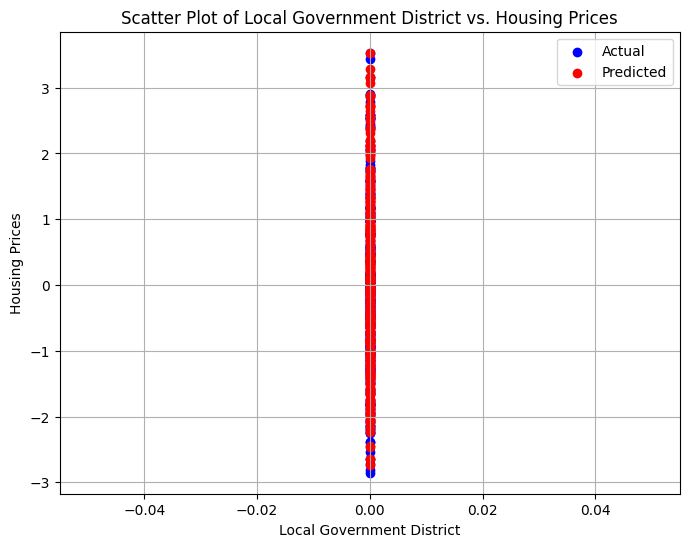

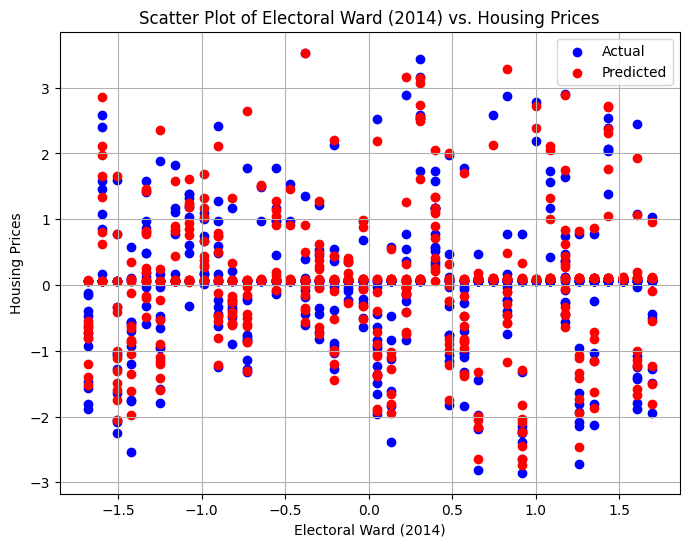

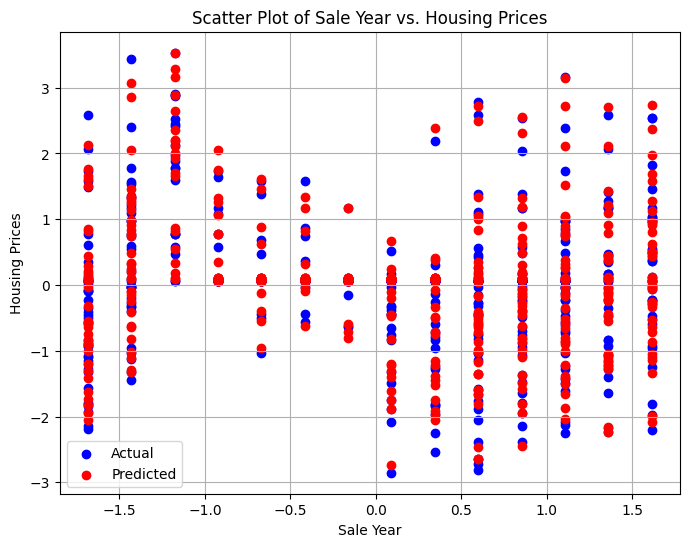

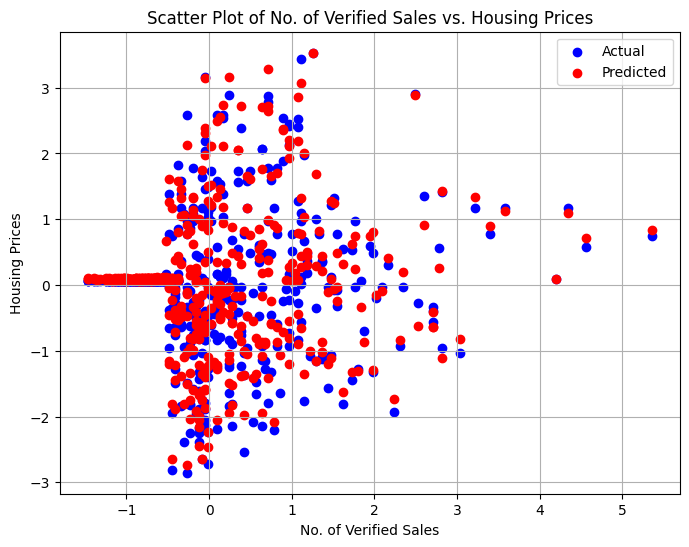

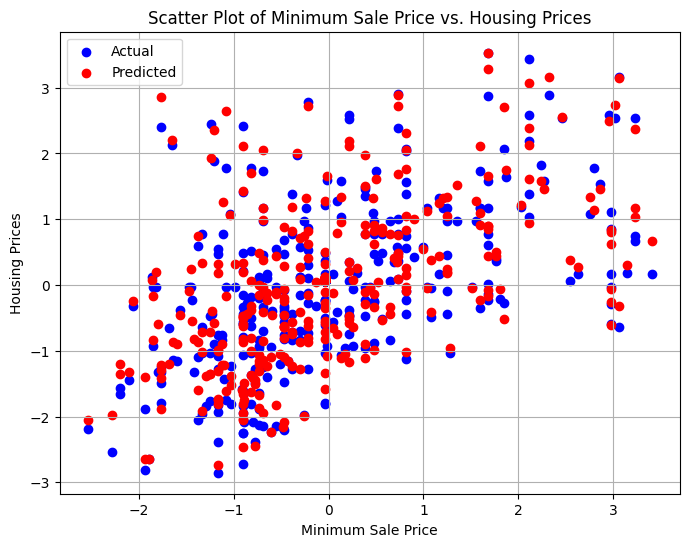

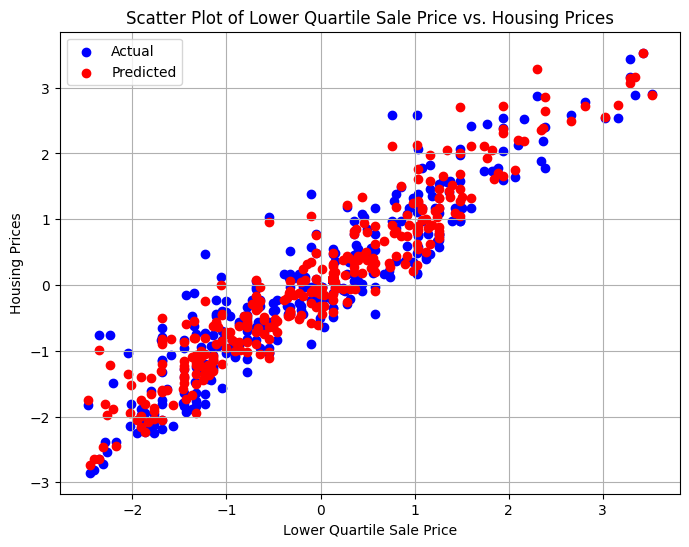

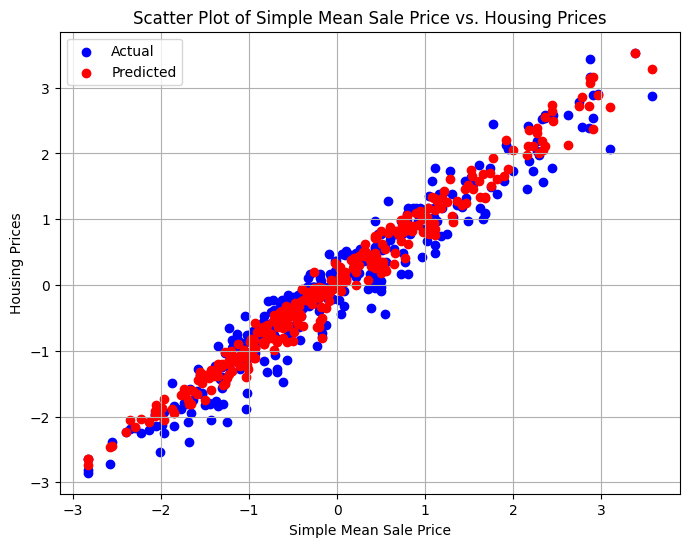

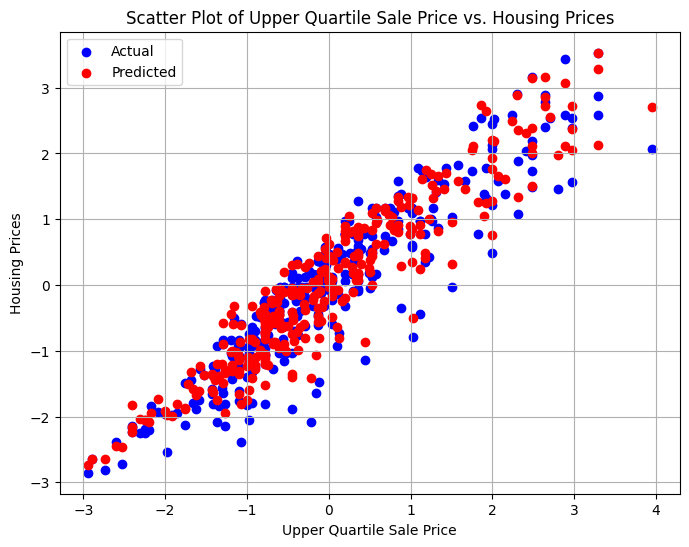

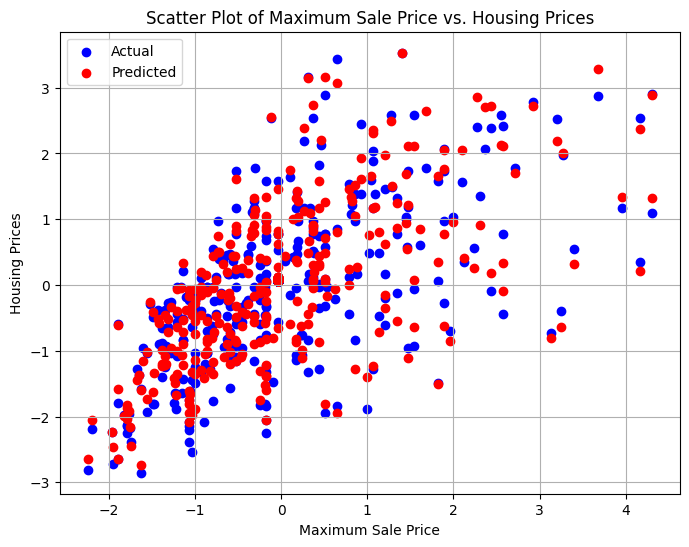

In [40]:
import matplotlib.pyplot as plt

# Assuming a linear regression model and stored it in the variable 'model'

# Get the predicted housing prices
y_pred = linear_model.predict(X)

# Plot scatter plots for each feature against the target variable (y) to visualize the relationships
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, color='blue', label='Actual')
    plt.scatter(X[feature], y_pred, color='red', label='Predicted')
    plt.title(f"Scatter Plot of {feature} vs. Housing Prices")
    plt.xlabel(feature)
    plt.ylabel("Housing Prices")
    plt.legend()
    plt.grid(True)
    plt.show()
